In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np

# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/2020_11_20_23_59_11"
# resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/2020_11_21_15_33_30"
resultsDir = "AAAAAAAAAAAAAAAAAAAAAAAAA/2020_11_22_15_07_50"

# Find all output folder
outputDirs = []
for fname in os.listdir(resultsDir):
    path = os.path.join(resultsDir, fname)
    if os.path.isdir(path):
        outputDirs.append(path)
        
# sort the list in order to match the testData.txt order
outputDirs.sort()
        
# Read all dice.txt files
diceData = []
for outputDir in outputDirs:
    diceFile = os.path.join(outputDir, "dice.txt")
    with open(diceFile, "r") as f:
        diceData.append(f.read())
        
# Find all the tests and initialize the dicts
dictSPBM = {}
dictSRC = {}
data = diceData[0].split("\n")
for line in data:
    col = line.find(":")
    if (line[:col]).isdigit():
        key = line[col+2:]
        dictSPBM[key] = []
        dictSRC[key] = []
        
# Populate the dicts
for data in diceData:
    lines = data.split("\n")
    for line in lines:
        col = line.find(":")
        if (line[:col]).isdigit():
            key = line[col+2:]
        elif line.startswith("SPBM: "):
            dictSPBM[key].append([float(num) for num in (line[6:]).strip('][').split(', ')])
        elif line.startswith("SRC: "):
            dictSRC[key].append([float(num) for num in (line[5:]).strip('][').split(', ')])
            
def getValues(key):
    values = key.split(',')
    string = "Atlases: "
    atlas  = int(values[0][len(string):])
    string = " P: "
    P = [int(num) for num in (values[1][len(string):]).strip('][').split(' ')]
    string = " N: "
    N = [int(num) for num in (values[2][len(string):]).strip('][').split(' ')]
    string = " lassoTol: "
    lassoTol = float(values[3][len(string):])
    return (atlas, P, N, lassoTol)

# Find all tests
atlases = []
Ps = []
Ns = []
lassoTols = []
for key, _ in dictSPBM.items():
    atlas, P, N, lassoTol = getValues(key)
    atlases.append(atlas)
    Ps.append(P)
    Ns.append(N)
    lassoTols.append(lassoTol)

def unique(a):
    indexes = np.unique(a, axis=0, return_index=True)[1]
    return [a[index] for index in sorted(indexes)]

atlases = unique(atlases)
Ps = unique(Ps)
Ns = unique(Ns)
lassoTols = unique(lassoTols)

if len(atlases) > 1:
    xlabels = atlases
    xlabel = "Number of atlases"
elif len(Ps) > 1:
    xlabels = Ps
    xlabel = "P"
elif len(Ns) > 1:
    xlabels = Ns
    xlabel = "N"
elif len(lassoTols) > 1:
    xlabels = lassoTols
    xlabel = "Lasso tollerance"

# Group per label
numOfLabels = 3

dataSPBM = []
dataSRC = []
for l in range(numOfLabels):
    dataSPBM.append([])
    dataSRC.append([])
    for _ in range(len(dictSPBM)):
        dataSPBM[l].append([])
        dataSRC[l].append([])
    
for index, (key, values) in enumerate(dictSPBM.items()):
    for v in values:
        for l in range(numOfLabels):
            dataSPBM[l][index].append(v[l])
        
for index, (key, values) in enumerate(dictSRC.items()):
    for v in values:
        for l in range(numOfLabels):
            dataSRC[l][index].append(v[l])


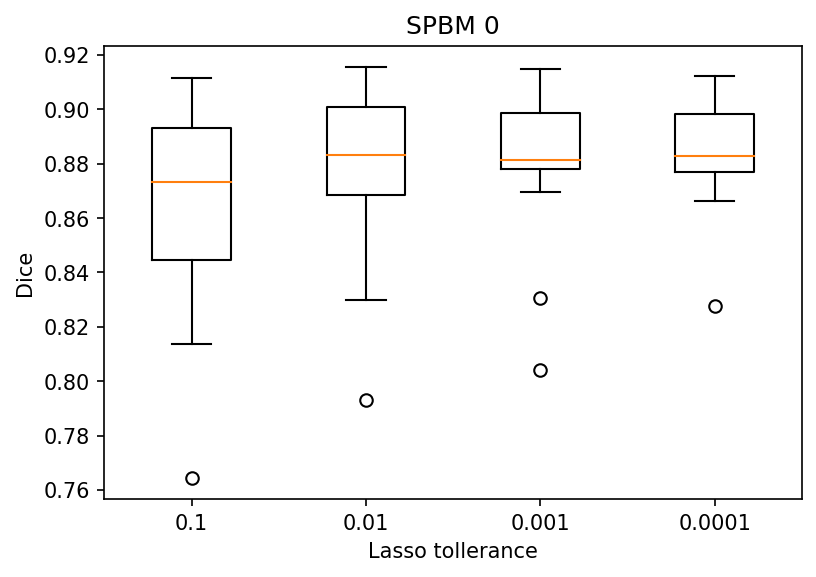

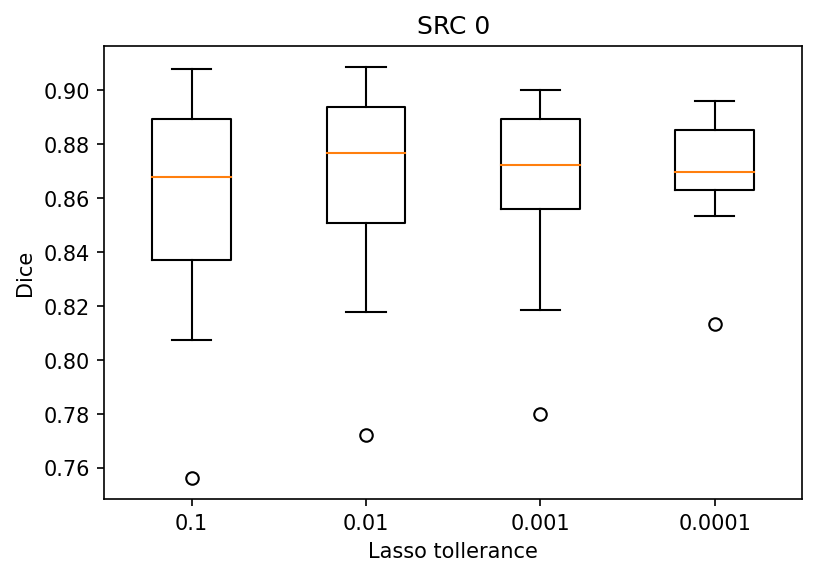

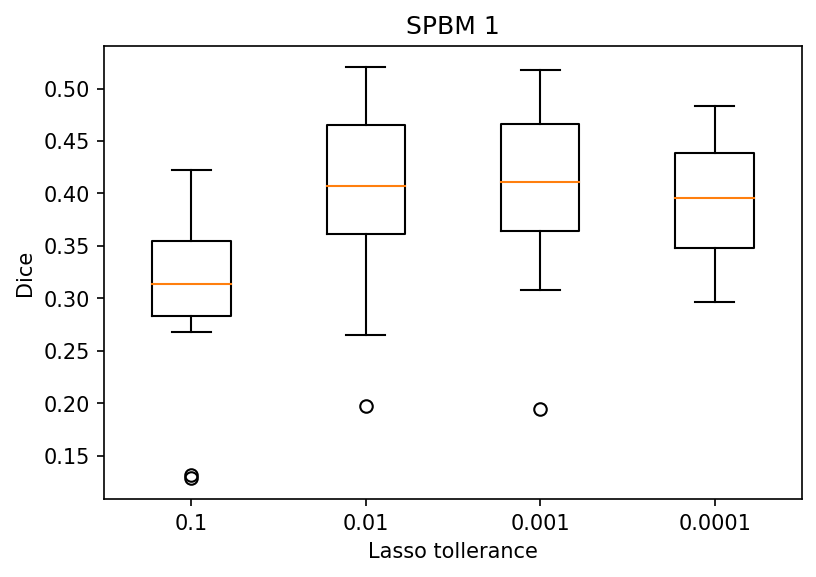

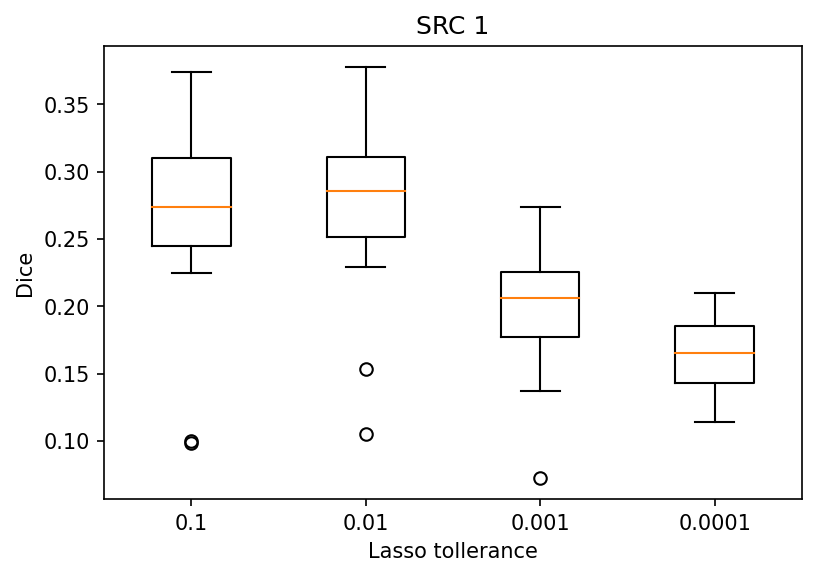

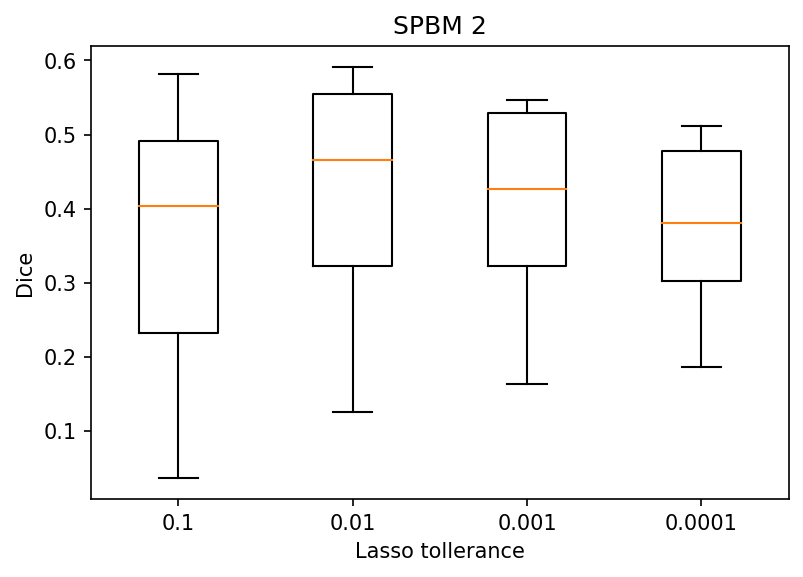

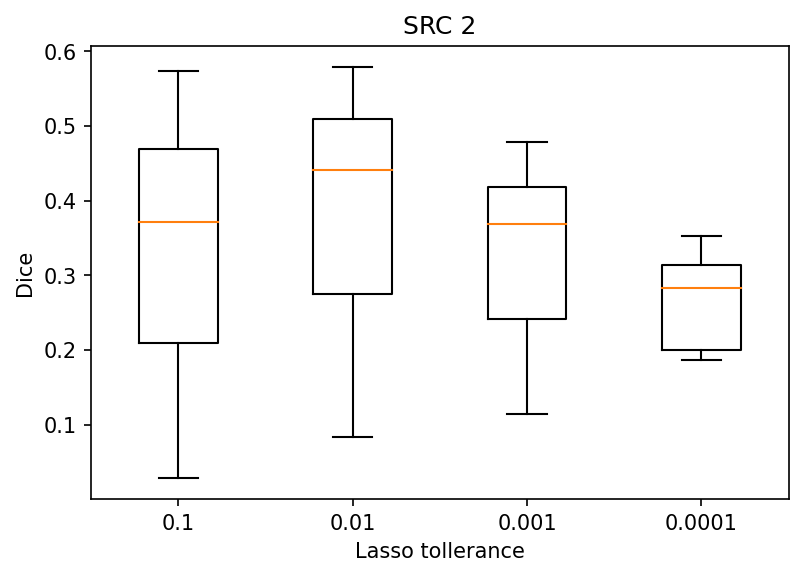

In [4]:

for l in range(numOfLabels):
    plt.figure(dpi=150)
    plt.boxplot(dataSPBM[l], labels=xlabels)
    plt.title(f"SPBM {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()
    
    plt.figure(dpi=150)
    plt.boxplot(dataSRC[l], labels=xlabels)
    plt.title(f"SRC {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()

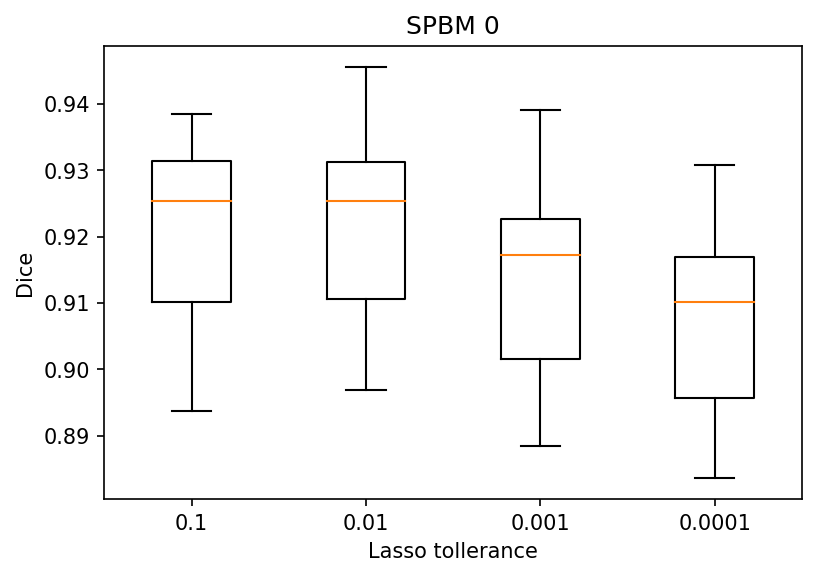

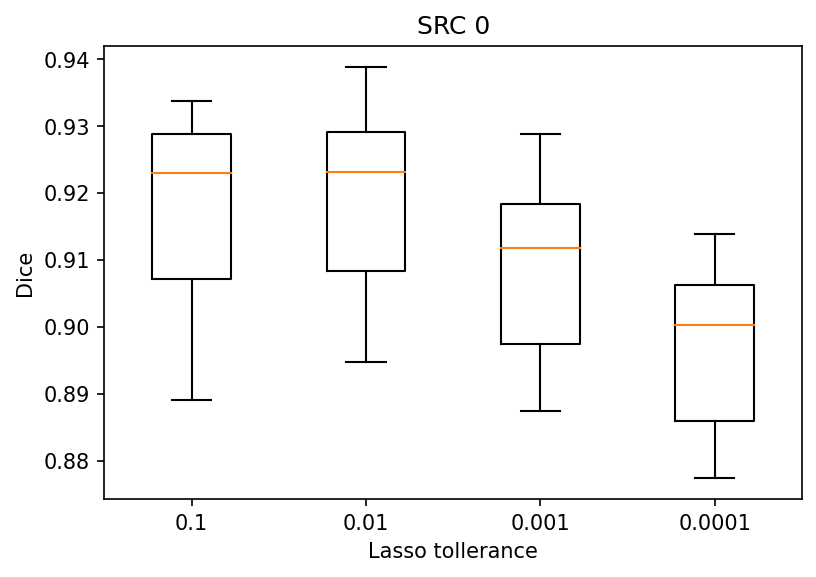

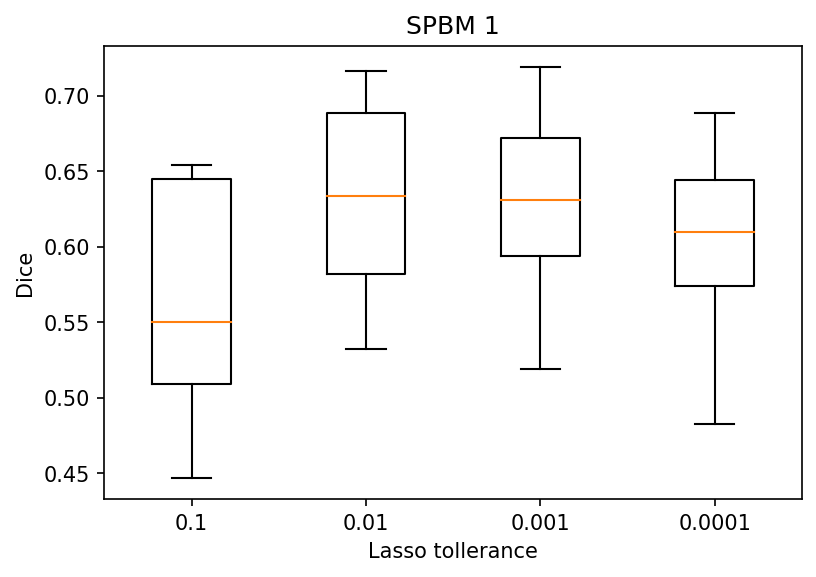

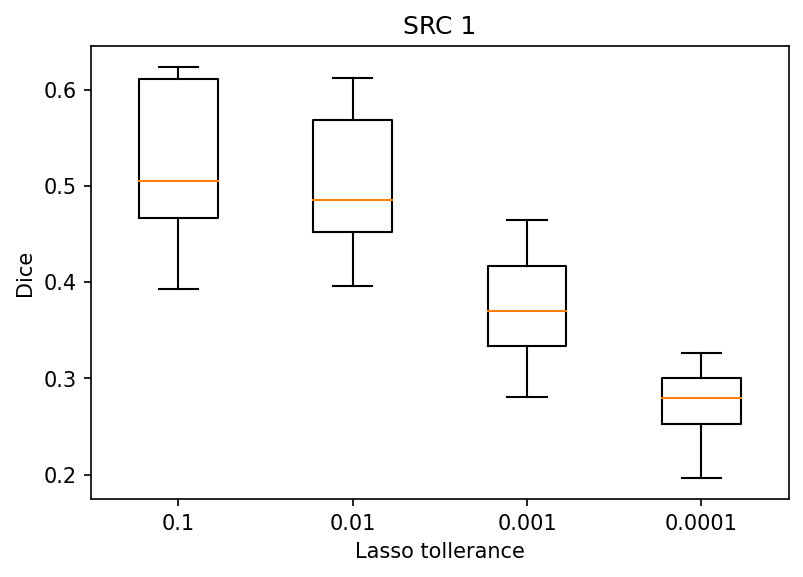

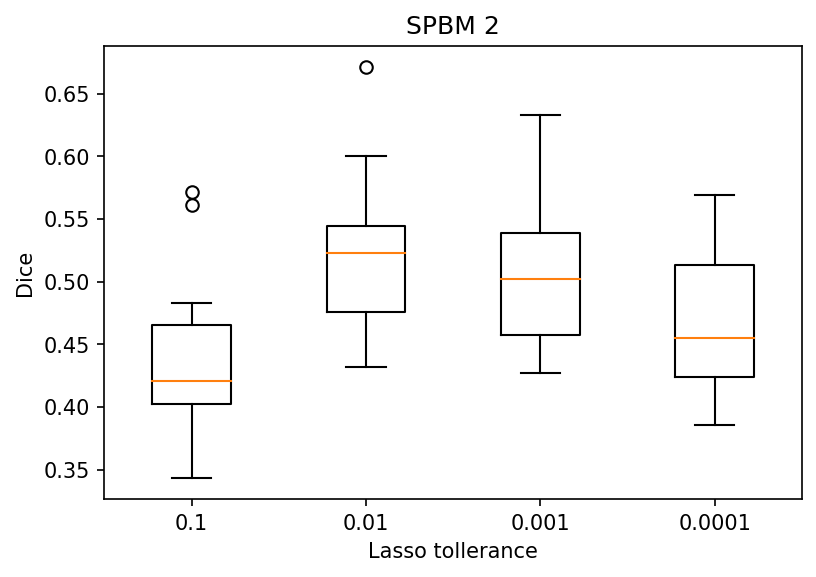

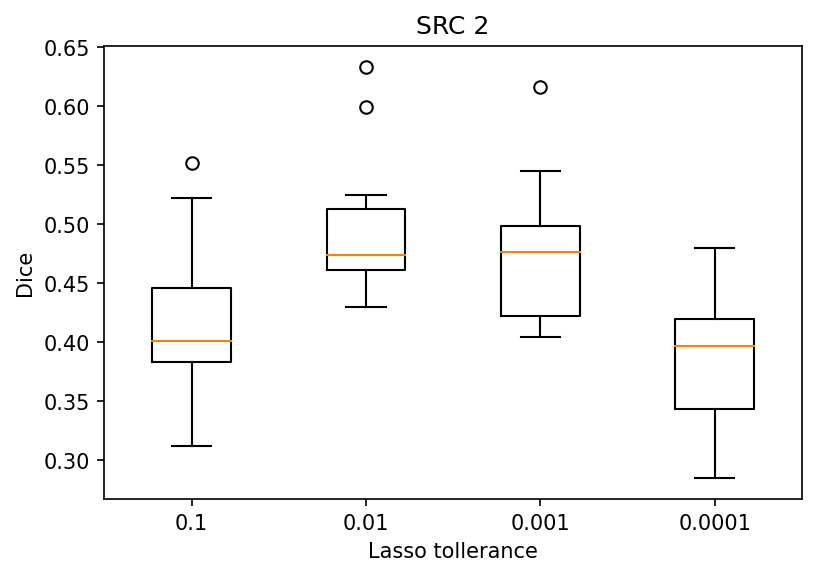

In [6]:

for l in range(numOfLabels):
    plt.figure(dpi=150)
    plt.boxplot(dataSPBM[l], labels=xlabels)
    plt.title(f"SPBM {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()
    
    plt.figure(dpi=150)
    plt.boxplot(dataSRC[l], labels=xlabels)
    plt.title(f"SRC {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()

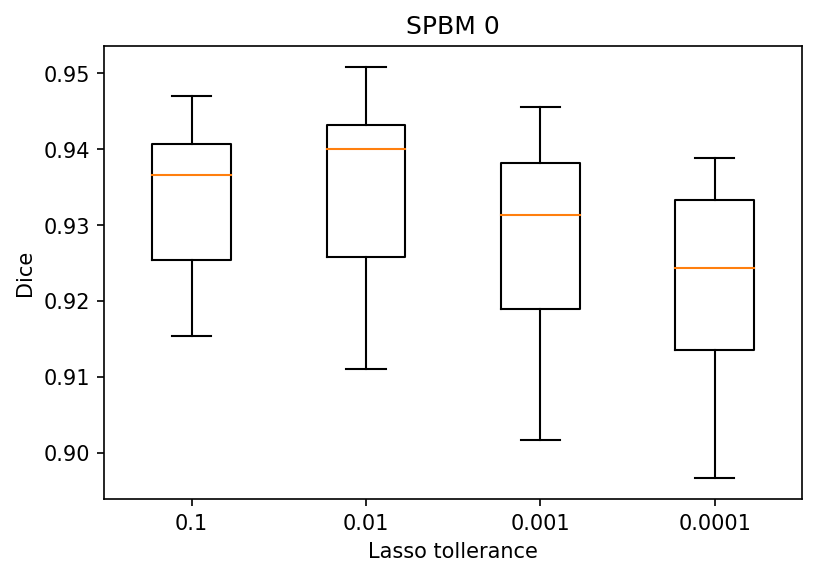

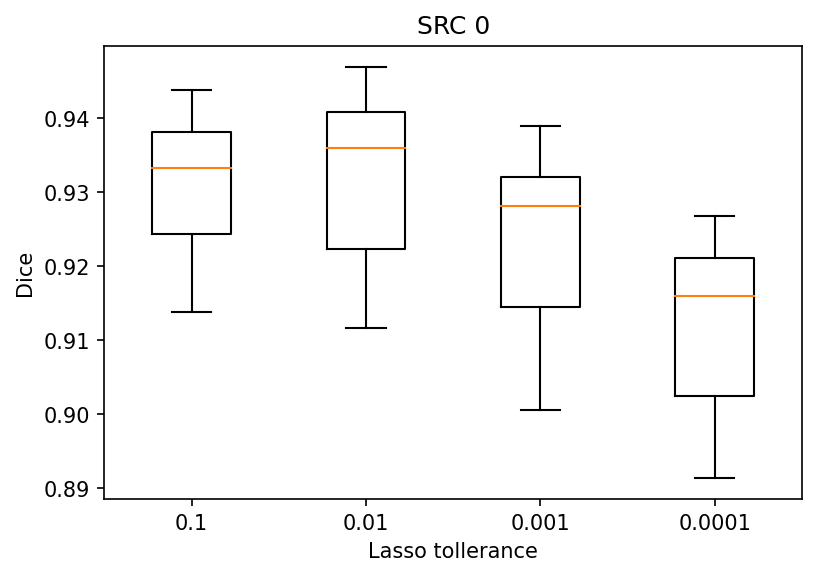

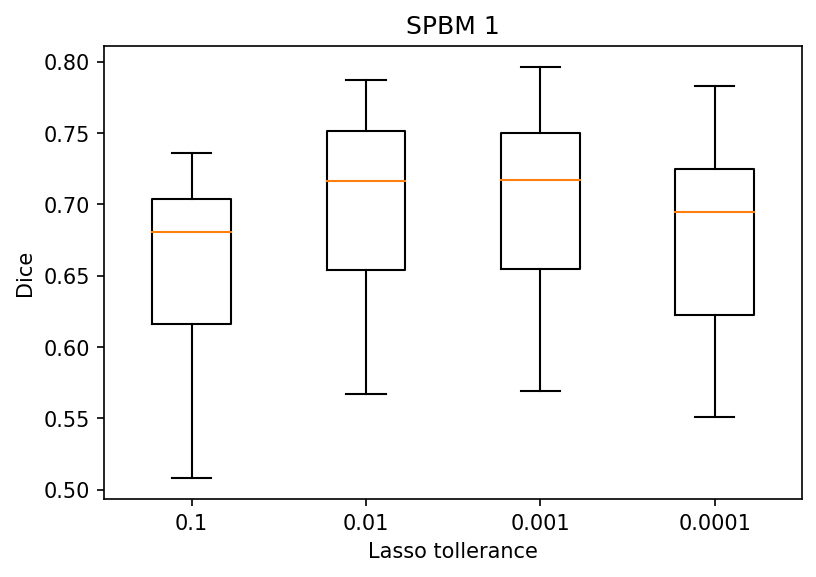

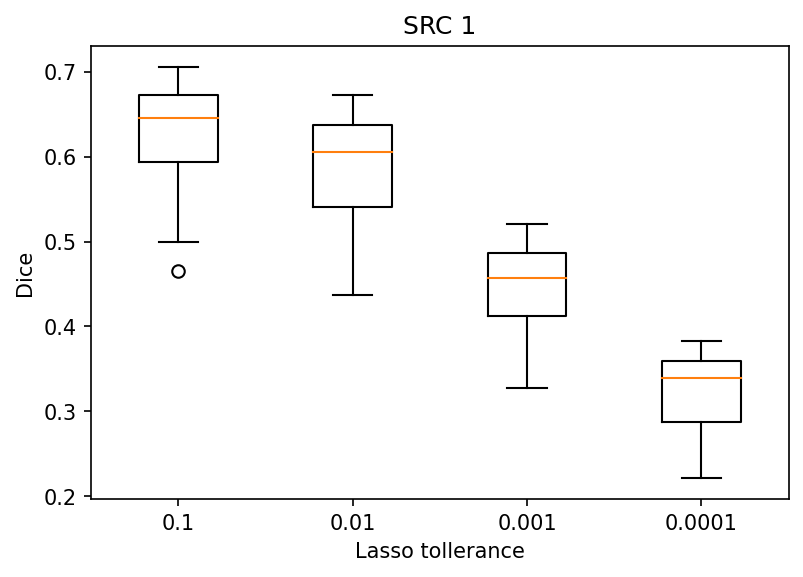

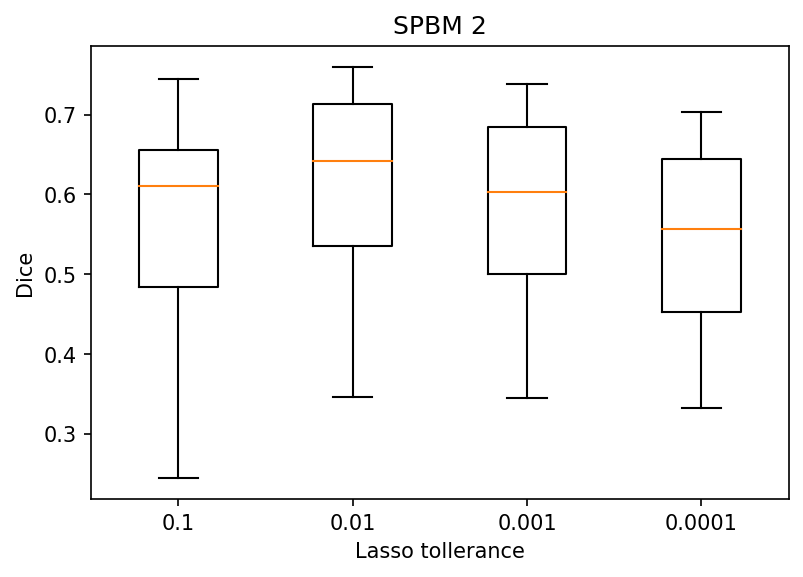

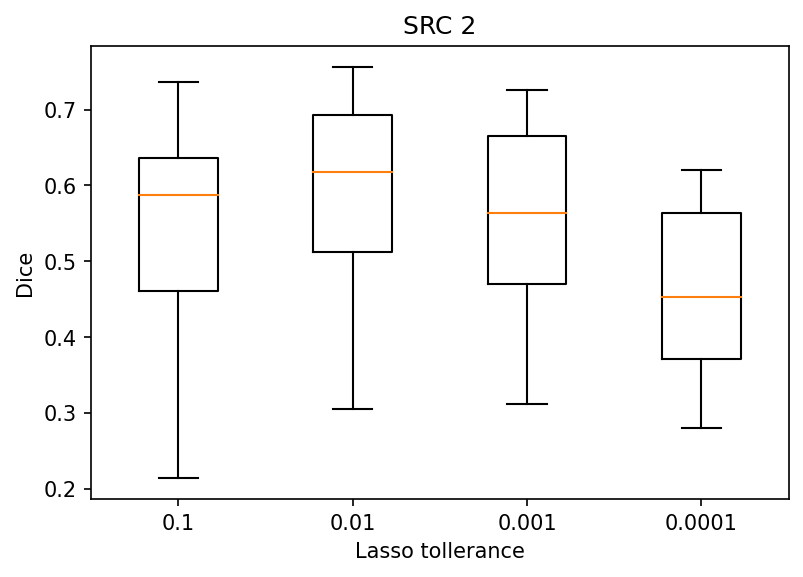

In [8]:

for l in range(numOfLabels):
    plt.figure(dpi=150)
    plt.boxplot(dataSPBM[l], labels=xlabels)
    plt.title(f"SPBM {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()
    
    plt.figure(dpi=150)
    plt.boxplot(dataSRC[l], labels=xlabels)
    plt.title(f"SRC {l}")
    plt.xlabel(xlabel)
    plt.ylabel("Dice")
    plt.show()